In [234]:
## !pip install mlxtend
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install xgboost
## !pip install onnxconverter_common
## !pip install --upgrade onnxmltools
## !pip install --upgrade onnxmltools onnxconverter_common
## !pip install skl2onnx

In [235]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [236]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score

In [237]:
import xgboost as xgb

In [238]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [239]:
batch_size    = 16
learning_rate = 0.001
N_Epochs      = 100

epsilon = 0.0001

In [240]:
path_data = r'C:\Users\micke\OneDrive\Documents\its 365\student-mat.csv'

stu_raw_data = pd.read_csv( path_data, delimiter=";" )

In [241]:
stu_raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [242]:
stu_raw_data.school = stu_raw_data.school.map( {'GP': 0, 'MS': 1})

In [243]:
stu_raw_data.sex = stu_raw_data.sex.map( {'F': 0, 'M': 1})

In [244]:
stu_raw_data.address = stu_raw_data.address.map( {'U': 0, 'R': 1})

In [245]:
stu_raw_data.famsize = stu_raw_data.famsize.map( {'LE3': 0, 'GT3': 1})

In [246]:
stu_raw_data.Pstatus = stu_raw_data.Pstatus.map( {'A': 0, 'T': 1})

In [247]:
stu_raw_data.Mjob = stu_raw_data.Mjob.map( {'at_home': 0, 'health': 1, 'other':3, 'teacher':4, 'services':5})

In [248]:
stu_raw_data.Fjob = stu_raw_data.Fjob.map( {'services': 0, 'other': 1, 'services': 2, 'health': 3, 'teacher': 3, 'at_home': 4})

In [249]:
stu_raw_data.reason = stu_raw_data.reason.map( {'course': 0, 'other': 1, 'home': 2, 'reputation':3})

In [250]:
stu_raw_data.guardian = stu_raw_data.guardian.map( {'mother': 0, 'father': 1, 'other': 2})

In [251]:
stu_raw_data.famsup = stu_raw_data.famsup.map( {'yes': 0, 'no': 1})

In [252]:
stu_raw_data.schoolsup = stu_raw_data.schoolsup.map( {'yes': 0, 'no': 1})

In [253]:
stu_raw_data.paid = stu_raw_data.paid.map( {'yes': 0, 'no': 1})

In [254]:
stu_raw_data.activities = stu_raw_data.activities.map( {'yes': 0, 'no': 1})

In [255]:
stu_raw_data.nursery = stu_raw_data.nursery.map( {'yes': 0, 'no': 1})

In [256]:
stu_raw_data.higher = stu_raw_data.higher.map( {'yes': 0, 'no': 1})

In [257]:
stu_raw_data.internet = stu_raw_data.internet.map( {'yes': 0, 'no': 1})

In [258]:
stu_raw_data.romantic = stu_raw_data.romantic.map( {'yes': 0, 'no': 1})

In [259]:
stu_raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,0,3,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,1,3,3,3,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,0,2,2,5,2,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,0,1,3,1,5,2,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,1,1,1,1,3,1,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,0,1,3,2,5,1,...,4,4,1,3,4,5,0,11,12,10


In [260]:
headers_list = stu_raw_data.columns.values.tolist()

headers_list

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [261]:
headers_list2 = [
 'age',
 'freetime', 'health', 'failures', 'absences']

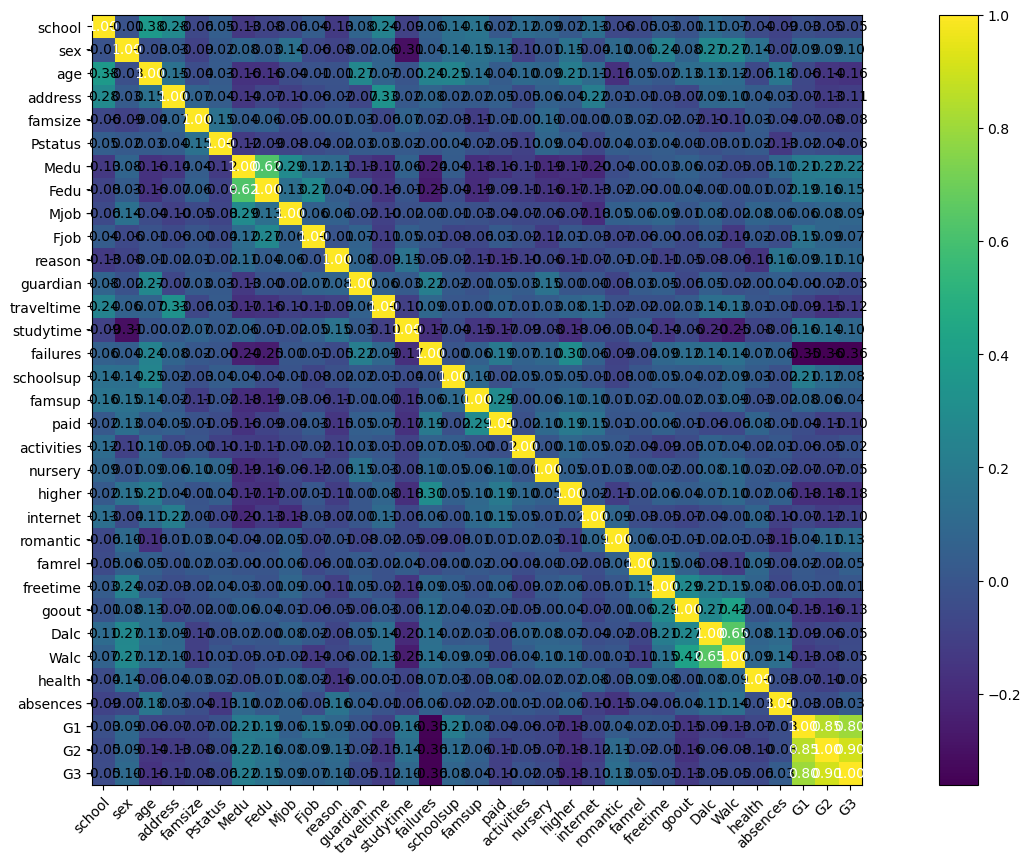

In [262]:
cm = np.corrcoef(   stu_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()

In [263]:
## Convert Pandas to Numpy

stu_raw_data_np = stu_raw_data.to_numpy()

In [264]:

stu_raw_data_np

array([[ 0,  0, 18, ...,  5,  6,  6],
       [ 0,  0, 17, ...,  5,  5,  6],
       [ 0,  0, 15, ...,  7,  8, 10],
       ...,
       [ 1,  1, 21, ..., 10,  8,  7],
       [ 1,  1, 18, ..., 11, 12, 10],
       [ 1,  1, 19, ...,  8,  9,  9]], dtype=int64)

In [265]:
stu_raw_data_np.shape

(395, 33)

In [266]:
X = stu_raw_data_np[:, :-1]


y = stu_raw_data_np[:, 32:33]

In [267]:
y

array([[ 6],
       [ 6],
       [10],
       ...,
       [ 7],
       [10],
       [ 9]], dtype=int64)

In [268]:
print(X.shape)

print(y.shape)

(395, 32)
(395, 1)


In [269]:
random_seed = int( random.random() * 100 )     ## 42

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [271]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 32)
(79, 32)
(316, 1)
(79, 1)


In [272]:
np.set_printoptions(threshold=100)  # Reset the threshold to default or any desired value
print(X_train)

[[ 0  0 16 ...  2 16 16]
 [ 0  1 15 ...  6 11 13]
 [ 0  0 16 ...  8  8  9]
 ...
 [ 0  0 15 ... 10 10 11]
 [ 0  0 16 ... 25  7 10]
 [ 0  1 16 ...  8  9  9]]


In [273]:
y_test.dtype 

dtype('int64')

In [274]:
X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )

In [275]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [276]:
print("X_train_tr size:", X_train_tr.size(0))
print("y_train_tr size:", y_train_tr.size(0))

X_train_tr size: 316
y_train_tr size: 316


In [277]:
print(X_train_tr.shape)
print(X_test_tr.shape)

torch.Size([316, 32])
torch.Size([79, 32])


In [278]:
x_means      = X_train_tr.mean(0, keepdim=True ) 

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [279]:
x_means

tensor([[ 0.1108,  0.4905, 16.6772,  0.2278,  0.7152,  0.9019,  2.7437,  2.5127,
          3.0886,  1.6804,  1.4241,  0.4146,  1.4525,  2.0316,  0.3354,  0.8766,
          0.3703,  0.5443,  0.5063,  0.2089,  0.0601,  0.1677,  0.6804,  3.9399,
          3.2627,  3.0791,  1.4557,  2.2722,  3.5475,  5.3481, 10.8703, 10.7184]])

In [280]:
x_deviations

tensor([[0.3144, 0.5008, 1.2689, 0.4202, 0.4521, 0.2980, 1.1017, 1.0735, 1.7031,
         0.8670, 1.2335, 0.6442, 0.7000, 0.8428, 0.7314, 0.3295, 0.4837, 0.4989,
         0.5009, 0.4072, 0.2382, 0.3743, 0.4672, 0.9049, 0.9649, 1.1256, 0.8516,
         1.2832, 1.3943, 7.4621, 3.3674, 3.7434]])

In [281]:
train_ds = TensorDataset( X_train_tr, y_train_tr  )

In [282]:
train_dl = DataLoader( train_ds, batch_size, shuffle=True  )

In [283]:

train_dl

In [284]:
class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(32, 16)  # Adjusted input size
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(16, 10)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(10, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)
        
        ## return torch.round( y_pred )
        return y_pred

In [285]:
def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 2 == 0:
            print(epoch, "loss=", loss)
            
        

In [286]:
## model = LinRegNet( x_means, x_deviations  )
model = DL_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate )
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(126.0567, grad_fn=<MseLossBackward0>)
2 loss= tensor(128.2619, grad_fn=<MseLossBackward0>)
4 loss= tensor(99.1164, grad_fn=<MseLossBackward0>)
6 loss= tensor(70.3153, grad_fn=<MseLossBackward0>)
8 loss= tensor(31.6492, grad_fn=<MseLossBackward0>)
10 loss= tensor(16.2167, grad_fn=<MseLossBackward0>)
12 loss= tensor(8.7550, grad_fn=<MseLossBackward0>)
14 loss= tensor(14.3566, grad_fn=<MseLossBackward0>)
16 loss= tensor(4.9086, grad_fn=<MseLossBackward0>)
18 loss= tensor(11.1177, grad_fn=<MseLossBackward0>)
20 loss= tensor(2.5492, grad_fn=<MseLossBackward0>)
22 loss= tensor(3.9934, grad_fn=<MseLossBackward0>)
24 loss= tensor(5.8576, grad_fn=<MseLossBackward0>)
26 loss= tensor(6.3089, grad_fn=<MseLossBackward0>)
28 loss= tensor(2.8275, grad_fn=<MseLossBackward0>)
30 loss= tensor(1.9348, grad_fn=<MseLossBackward0>)
32 loss= tensor(3.0376, grad_fn=<MseLossBackward0>)
34 loss= tensor(1.8858, grad_fn=<MseLossBackward0>)
36 loss= tensor(0.7858, grad_fn=<MseLossBackward0>)
38 loss

In [287]:
y_pred_test = model( X_test_tr )

In [288]:
y_pred_test.shape

torch.Size([79, 1])

In [289]:
## y_pred_test

In [290]:
print( "Testing R**2: ", r2_score(  y_test_tr.numpy(),  y_pred_test.detach().numpy()))

Testing R**2:  0.6772855985787867


In [291]:
y_pred_test.shape

torch.Size([79, 1])

In [292]:
y_test_tr.shape

torch.Size([79, 1])

In [293]:
len(X_test_tr)

79

In [294]:
list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("************************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real[0])

************************************
pred, real
(array([7.86515], dtype=float32), array([9.], dtype=float32))
************************************
pred, real
(array([3.2669697], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([9.157207], dtype=float32), array([10.], dtype=float32))
************************************
pred, real
(array([8.157832], dtype=float32), array([6.], dtype=float32))
************************************
pred, real
(array([11.909507], dtype=float32), array([14.], dtype=float32))
************************************
pred, real
(array([2.7782295], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([13.002067], dtype=float32), array([12.], dtype=float32))
************************************
pred, real
(array([9.614178], dtype=float32), array([11.], dtype=float32))
************************************
pred, real
(array([9.066947], dtype=float32), array([7.], dtype=floa

In [302]:
model.eval()

dummy_input = torch.randn(1, 32)

input_names  = ["input1"]
output_names = ["output1"]

torch.onnx.export(
        model, 
        dummy_input,
        "DLnet_WineData.onnx",
        verbose=False,
        input_names = input_names,
        output_names = output_names
        
)

In [303]:
regressor = xgb.XGBRegressor(

        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
)

In [304]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [305]:
y_pred = regressor.predict(X_test)

In [306]:
y_pred.shape

(79,)

In [307]:
y_pred

array([ 9.573044 ,  1.1084208,  8.742594 ,  9.034635 , 12.058612 ,
       -1.2935956, 12.787919 ,  9.079884 ,  6.3004403, 13.634274 ,
       12.751323 , 10.267053 , 15.453169 , 10.30344  , 14.797624 ,
        9.74326  , 11.907312 , 14.646485 , 16.088446 , 15.095115 ,
        9.079386 ,  1.171737 ,  9.876821 , 14.654722 , 10.412528 ,
        8.2795315, 10.765997 , 11.841367 , 14.05238  ,  5.3828034,
        6.156676 , 10.790185 ,  4.945125 ,  6.9588385, 10.871247 ,
       19.223478 , 13.519218 ,  7.2915635, 12.878969 ,  6.983766 ,
        2.8531616,  8.345469 , 10.323214 , 14.502439 , 11.404365 ,
        8.777825 , 14.065202 , 12.618108 , 11.737064 , 12.857709 ,
       12.80047  , 15.247088 , 16.71266  ,  4.3365355, 14.212883 ,
       11.134324 , 10.033728 , 12.777186 , 18.839802 ,  8.457048 ,
       14.825944 ,  6.9002438,  6.012468 ,  7.695447 ,  7.528156 ,
        4.8122253, 11.921916 ,  8.349457 , 11.702372 , 11.377053 ,
        9.634556 , 16.938738 , 15.554277 , 14.975487 , 10.1842

In [308]:
r2_score(y_test, y_pred)

0.8510021178775112

In [318]:
initial_types = [(
          'float_input',
          FloatTensorType(  [None, 32 ]  )

)]

In [319]:
onnx_model = onnxmltools.convert_xgboost(regressor, initial_types=initial_types)

onnxmltools.utils.save_model(onnx_model, 'xgboost_WineQuality_ort.onnx')

In [320]:
sess = rt.InferenceSession('xgboost_WineQuality_ort.onnx')

In [321]:
input_name = sess.get_inputs()[0].name

In [322]:
input_name

'float_input'

In [323]:
label_name = sess.get_outputs()[0].name

In [324]:
label_name

'variable'

In [325]:
pred_ort = sess.run(  [label_name], {input_name: X_test.astype(np.float32)}  )

In [326]:
pred_ort[0]

array([[ 9.573045 ],
       [ 1.1084213],
       [ 8.742597 ],
       [ 9.034632 ],
       [12.058607 ],
       [-1.2935934],
       [12.787918 ],
       [ 9.079884 ],
       [ 6.3004413],
       [13.63427  ],
       [12.751324 ],
       [10.267053 ],
       [15.453171 ],
       [10.30344  ],
       [14.797624 ],
       [ 9.743263 ],
       [11.90731  ],
       [14.646486 ],
       [16.088446 ],
       [15.095113 ],
       [ 9.079386 ],
       [ 1.1717367],
       [ 9.876822 ],
       [14.654722 ],
       [10.41253  ],
       [ 8.279532 ],
       [10.765998 ],
       [11.84137  ],
       [14.0523815],
       [ 5.3828034],
       [ 6.1566753],
       [10.790182 ],
       [ 4.9451246],
       [ 6.9588385],
       [10.871252 ],
       [19.223473 ],
       [13.519219 ],
       [ 7.291565 ],
       [12.878973 ],
       [ 6.983766 ],
       [ 2.8531632],
       [ 8.345472 ],
       [10.323213 ],
       [14.502441 ],
       [11.404369 ],
       [ 8.777826 ],
       [14.065204 ],
       [12.61